##Generate Pdfs


In [2]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.9 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Create a DataFrame
data = {
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}
df = pd.DataFrame(data)
display(df)

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


In [4]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, landscape, mm
from reportlab.platypus import Paragraph, SimpleDocTemplate, Table, TableStyle, Frame,LongTable,PageTemplate
from reportlab.lib.styles import getSampleStyleSheet
import os
import shutil
import random
import pickle
class RandomValueGenerator:
    def __init__(self) -> None:
        self.points = list(range(1,50))
        self.track_circuit = ['DMT','CL1T','CL2T','GLT']
        self.tins_free = [f"N-{i}" for i in range(1,50)]
        self.tags = [f"R-{i}" for i in range(1,50)]
    def _random_combination(self, pool,r=10):
        return ', '.join(map(str,random.sample(pool,random.randint(1,r))))
    def _random_combination_(self, pool,r=10):
        return '-' if random.choice([True,False]) else self._random_combination(pool,r)
    def _random_signal(self):
        return 'S'+str(random.randint(1,50))+(' ID' if random.choice([True,False]) else '')
    def _random_line(self):
        return random.choice(['Down Main','Common Loop 1','Common Loop 2', 'Goods Loop'])
    def _random_aspect_signal(self):
        return random.choice(['Red','Green', 'Yellow','Double Yellow', 'Yellow with "Pos1"', 'Yellow with "Pos2"', 'Yellow with "Pos4"'])
    def _random_required_points(self):
        return self._random_combination_(self.points)
    def _random_required_tracks(self):
        return self._random_combination_(self.track_circuit,4)
    def _random_tins_free(self):
        return self._random_combination_(self.tins_free)
    def _random_tags(self,r):
        return self._random_combination_(self.tags,r)
    def _random_sds(self):
        return ('-','-','-') if random.choice([True,False]) else (str(random.randint(1,20)*5), str(random.randint(1,99)*10), str(random.randint(1,200)*10))
    def _random_eed(delf):
        return str(random.randint(100,200)*10)
    def _random_ma(delf):
        return str(random.randint(100,600)*10)
class TableGenerator(RandomValueGenerator):
    def __init__(self) -> None:
        super().__init__()
        self.table_data = []
        self.style = TableStyle([
        ('INNERGRID', (0, 0), (-1, -1), 0.25, colors.black),
        ('BOX', (0, 0), (-1, -1), 0.25, colors.black),
        ])

        self.current_row = 0
        self.mega_list = []
    def _make_header(self):
        row1 =[
            'Entry Signal',
            'Exit Signal',
            'Line',
            'Aspect of Entry Signal',
            'Requires Aspects of Signal',
            'Requires Points In Route',
            '',
            'Requires Track Circuit UP In Route',
            'Requires TINs Free',
            'Check RFID',
            '',
            '',
            'Turnout',
            '',
            '',
            'Distance between Entry & Exit Signal (Meters)',
            'Movement Authority From Foot of Entry Signal (Meters)']
        row2 =[
            '',
            '',
            '',
            '',
            '',
            'Normal',
            'Reverse',
            '',
            '',
            'Entry Signal Foot Tag',
            'En-Route Tags',
            'Conflicting Tags',
            'Speed (kmph)',
            'Distance to Commence (Meters)',
            'Speed Restriction Distance (Meters)',
            '',
            '']
        self.table_data.append(row1)
        self.table_data.append(row2)
        self.style.add('SPAN',(5,0),(6,0))
        self.style.add('SPAN',(9,0),(11,0))
        self.style.add('SPAN',(12,0),(14,0))
        self.current_row=2
        for i in [0,1,2,3,4,7,8,15,16]:
            self.style.add('SPAN',(i,0),(i,1))
    def _make_row(self):
        row1 = [
            self._random_signal(),
            self._random_signal(),
            self._random_line(),
            self._random_aspect_signal(),
            self._random_aspect_signal(),
            self._random_required_points(),
            self._random_required_points(),
            self._random_required_tracks(),
            self._random_tins_free(),
            self._random_tags(1),
            self._random_tags(8),
            self._random_tags(20),
        ] + list(self._random_sds())+[
            self._random_eed(),
            self._random_ma()
        ]
        self.table_data.append(row1)
        extra_row =['']*17
        extra = random.randint(1,3)*2
        for i in range(1,extra):
            extra_row[3] = self._random_aspect_signal()
            extra_row[4] = self._random_aspect_signal()
            extra_row[16] = self._random_ma()
            self.table_data.append(extra_row)
        for i in [0,1,2,5,6,7,8,9,10,11,12,13,14,15]:
            self.style.add('SPAN',(i,self.current_row),(i,self.current_row+extra-1))
        self.current_row+=extra #increment to new row location
    def _table_initalizer(self, n_entries):
        self.table_data=[]
        self._make_header()
        for _ in range(n_entries):
            self._make_row()
        self.mega_list.append([self.table_data])
    def make_table_pdf(self, filename = "sample.pdf", n_entries= 2):
        self._table_initalizer(n_entries)
        doc = SimpleDocTemplate(filename, pagesize=landscape(letter))
        elements = []
        styles = getSampleStyleSheet()
        styleN = styles['Normal']
        styleN.wordWrap = 'CJK'
        styleN.fontSize = 6
        new_table_data = [[Paragraph(cell, styleN) for cell in row] for row in self.table_data]
        frame = Frame(doc.leftMargin, doc.bottomMargin, doc.width, doc.height - 2 * mm, id='normal')
        colwidths = [frame._width/17. for i in range(17)]
        t = LongTable(new_table_data, colWidths=colwidths)
        t.setStyle(self.style)
        elements.append(t)
        template = PageTemplate(id='longtable', frames=frame)
        doc.addPageTemplates([template])
        doc.build(elements)
    def save_data(self, path):
        with open(path, 'wb') as f:
            pickle.dump(self.mega_list, f)

def generate_files(n, name='table', path = 'pdf-data', var_path = 'data.pkl'):
    tg = TableGenerator()
    # Create the directory if it doesn't exist
    if not os.path.exists(path):
        os.makedirs(path)
    for i in range(n):
        filename = name+str(i)+'.pdf'
        tg.make_table_pdf(filename, random.randint(2,6))
        shutil.move(filename, path+'/'+filename)
    tg.save_data(var_path)
def test(filename):
    tg = TableGenerator()
    tg.make_table_pdf(filename,6)
generate_files(10)

## Extract Information from the pdfs

In [5]:
# Load (deserialize) the 3D list from the file
with open('data.pkl', 'rb') as f:
    loaded_3d_list = pickle.load(f)

### camelot 0.11.0

In [6]:
!pip install camelot-py==0.11.0
!apt install ghostscript python3-tk
!pip install tkintertable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 30.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9 libgs9-common libidn12
  libijs-0.35 libjbig

In [7]:
import camelot
camelot.__version__

'0.11.0'

In [8]:
!apt install ghostscript python3-tk
!pip install tkintertable
!pip install ghostscript

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ghostscript is already the newest version (9.55.0~dfsg1-0ubuntu5.6).
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [12]:
import camelot
import pandas as pd
pdf_path = 'pdf-data/table0.pdf'
tables = camelot.read_pdf(pdf_path,flavour="lattice", line_scale = 30)
preprocessed_tables = [df.df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x) for df in tables]
for df in preprocessed_tables:
  display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Entry Signal,Exit Signal,Line,Aspectof EntrySignal,RequiresAspectsof Signal,Requires Points InRoute,,RequiresTrack Circuit UPIn Route,RequiresTINs Free,Check RFID,,,Turnout,,,Distance between Entry & Exit Signal (Meters),Movement Authority FromFoot ofEntry Signal (Me...
1,,,,,,Normal,Reverse,,,Entry Signal FootTag,En-Route Tags,Conflicting Tags,Speed(kmph),Distanceto Commence (Meters),SpeedRestriction Distance (Meters),,
2,S5 ID,S28,CommonLoop 1,"Yellowwith ""Pos2""",DoubleYellow,"34, 29,35, 39,22, 47,40, 45,19",-,CL2T,-,R-27,-,-,65,670,220,1840,5660
3,,,,"Yellowwith ""Pos1""",DoubleYellow,,,,,,,,,,,,3740
4,,,,"Yellowwith ""Pos1""",DoubleYellow,,,,,,,,,,,,3740
5,,,,"Yellowwith ""Pos1""",DoubleYellow,,,,,,,,,,,,3740
6,,,,"Yellowwith ""Pos1""",DoubleYellow,,,,,,,,,,,,3740
7,,,,"Yellowwith ""Pos1""",DoubleYellow,,,,,,,,,,,,3740
8,S9,S19 ID,CommonLoop 2,DoubleYellow,"Yellowwith ""Pos2""",-,"29, 7,21, 27,10","CL2T,CL1T",-,-,"R-20, R-42, R-45","R-44, R-17, R-42,R-24, R-34, R-3,R-47",-,-,-,1390,5160
9,,,,Yellow,Green,,,,,,,,,,,,5830


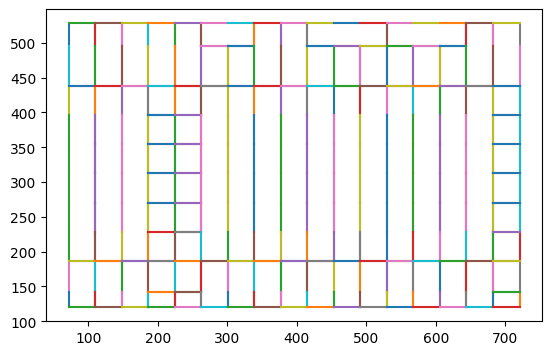

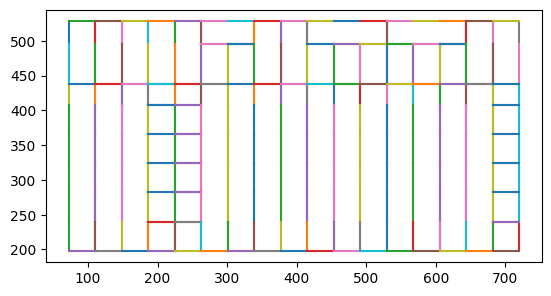

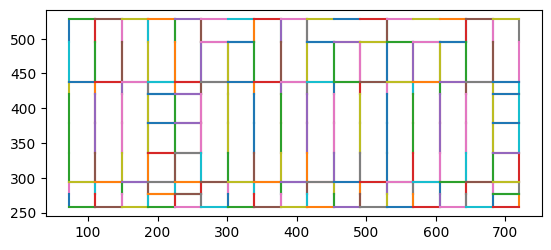

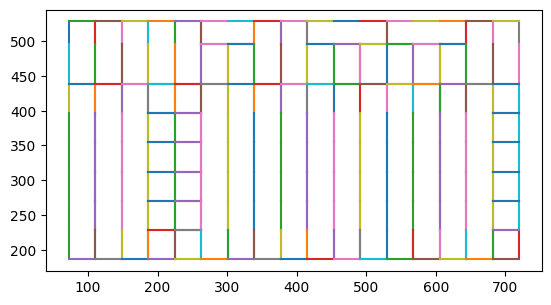

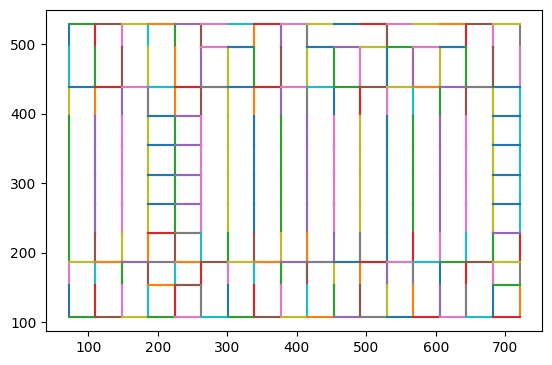

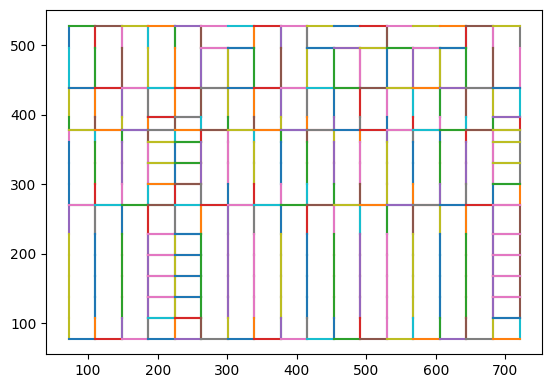

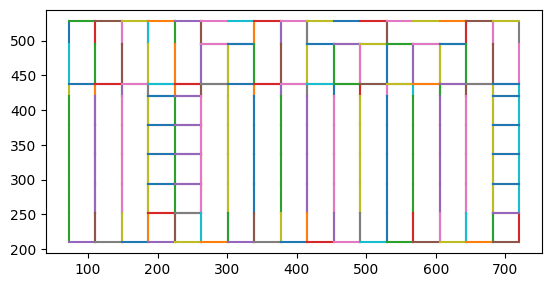

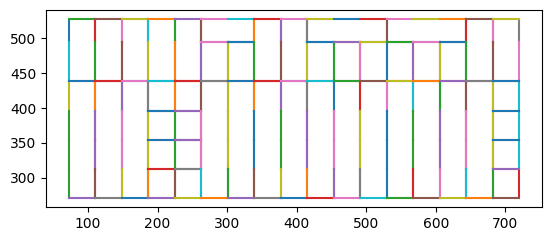

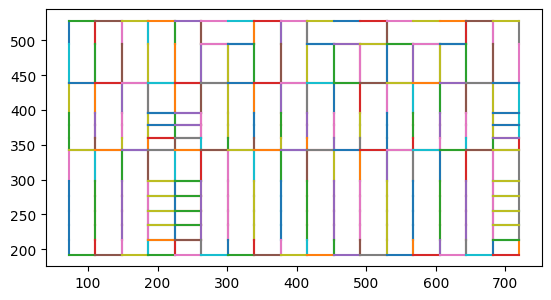

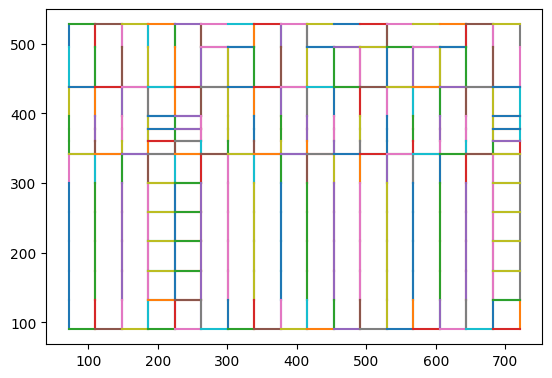

In [15]:
for pdf_path in ['pdf-data/table0.pdf','pdf-data/table1.pdf','pdf-data/table2.pdf','pdf-data/table3.pdf','pdf-data/table4.pdf','pdf-data/table5.pdf','pdf-data/table6.pdf','pdf-data/table7.pdf','pdf-data/table8.pdf', 'pdf-data/table9.pdf']:
  tables = camelot.read_pdf(pdf_path,flavour="lattice", line_scale = 30)
  # preprocessed_tables = [df.df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x) for df in tables]
  camelot.plot(tables[0], kind='grid').show()